<a href="https://colab.research.google.com/github/james-monahan/Stats_Calc_Workshop/blob/main/Math_Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import e

statsmodels: 
 http://www.statsmodels.org/stable/index.html  

PyMC3: (bayesian)  
https://docs.pymc.io/  

SymPy: symbolic math  
https://www.sympy.org/en/index.html  


#Sampling With Numpy random

In [ ]:
np.random.seed(0)
samples = np.random.normal(loc=100, scale=10, size=(2, 3))
samples = np.random.poisson(lam=10, size=(2, 2))
samples = np.random.randint(low=0, high=10, size=(2, 5))
samples = np.random.choice([1, 3, 4, -6], size=(2, 2))
# np.random.shuffle()

In [ ]:
#python stats toolbox

#T-Tests  
used to compare two mean (average) statistics and conclude whether they are different enough from each other.  

Independent samples t-tests (used to compare the means of two independent samples), paired sample t-tests (used to compare the means of the same group at different times), and one-sample t-tests (used to compare the mean of one group with a predetermined mean)

In [ ]:
samples_a = np.random.normal(size=20)
samples_b = np.random.normal(0.2, 1, size=20)

stats.ttest_ind(samples_a, samples_b).pvalue

0.21192162396428862

#Functions:  
Families - constant, linear, polynomial, log, exp  

A root of a function is a value belonging to its domain that makes the output equal to zero. The process of finding all roots of a function f(x) is equivalent to solving the equation f(x) = 0.  

Given a graph on a two-dimensional plane, if, for every vertical line (every line that is parallel to the y axis), the graph has more than one intersection, then it is not the plot of a valid function.  

Domain, the range, the vertical line test.  

An equation is formed when a function is assigned the value 0 and we are asked to find the values of the function input, normally x, that satisfy the equation.

In [ ]:
from sympy import Symbol
from sympy.solvers import solve
x = Symbol('x')
solve(x ** 3 - 7 * x ** 2 + 15 * x - 9, x)

[1, 3]

###Systems of Equations  
Operations:  
Swap the locations of any given two rows.  
Multiply a row by a non-zero constant.  
Add a row to any other row (potentially multiplied by a non-zero constant as well).  
*      
  
In this matrix notation, the vector x can be solved quite easily as x = A**-1 c, where A**-1 is the inverse matrix of A. An inverse matrix, M**-1, of any given matrix, M, is the matrix that satisfies the equation A A**-1 = I, where I is the identity matrix. The dot product between A-1 and c will give us a vector that makes up the solution of the system.



In [ ]:
from numpy.linalg import inv, LinAlgError
#takes in a two-dimensional NumPy array representing a matrix and returns the corresponding inverse matrix

In [ ]:
def solve_eq_sys(coeff_matrix, c):
    try:
        inv_matrix = inv(coeff_matrix)
        return inv_matrix.dot(c)
    except LinAlgError:
        return False

In [ ]:
#Non linear equations using  'solve for a variable in terms of another variable by transforming an equation)
#returns solution (x,y)
x = Symbol('x')
y = Symbol('y')

solve([x + y - 5, x ** 2 - x + 2 * y - 8],x, y)

[(1, 4), (2, 3)]

#Recursion

 Given the first three elements of the sequence, Pn, that is, P1=1, P2=7, and P3=2, find the next seven terms of the sequence that is recursively defined via the relation: Pn+3= (3*Pn+1 - Pn+2)/(Pn – 1) (n+ is subscript)

In [ ]:
def p_n(n):
    #( -1 makes our function bounded and protected from entering infinite loops and invalid input)
    if n < 1:
        return -1
    elif n == 1:
        return 1
    elif n == 2:
        return 7
    elif n == 3:
        return 2
    else:
        pn = (3*p_n(n-2) - p_n(n-1) )/ (p_n(n-3) + 1)
        return pn

In [ ]:
for i in range(1,11):
    print(p_n(i))

1
7
2
9.5
-0.4375
9.645833333333334
-1.0436507936507937
53.29982363315697
-5.30073825572847
-3784.586609737289


#Trigonometric Functions

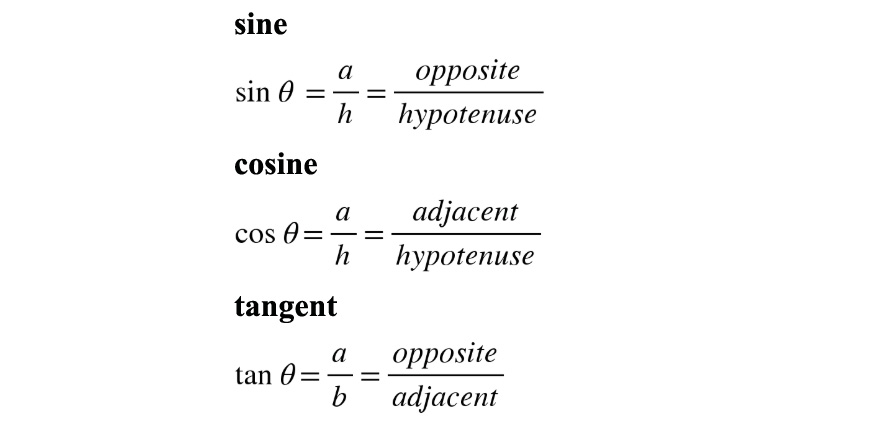

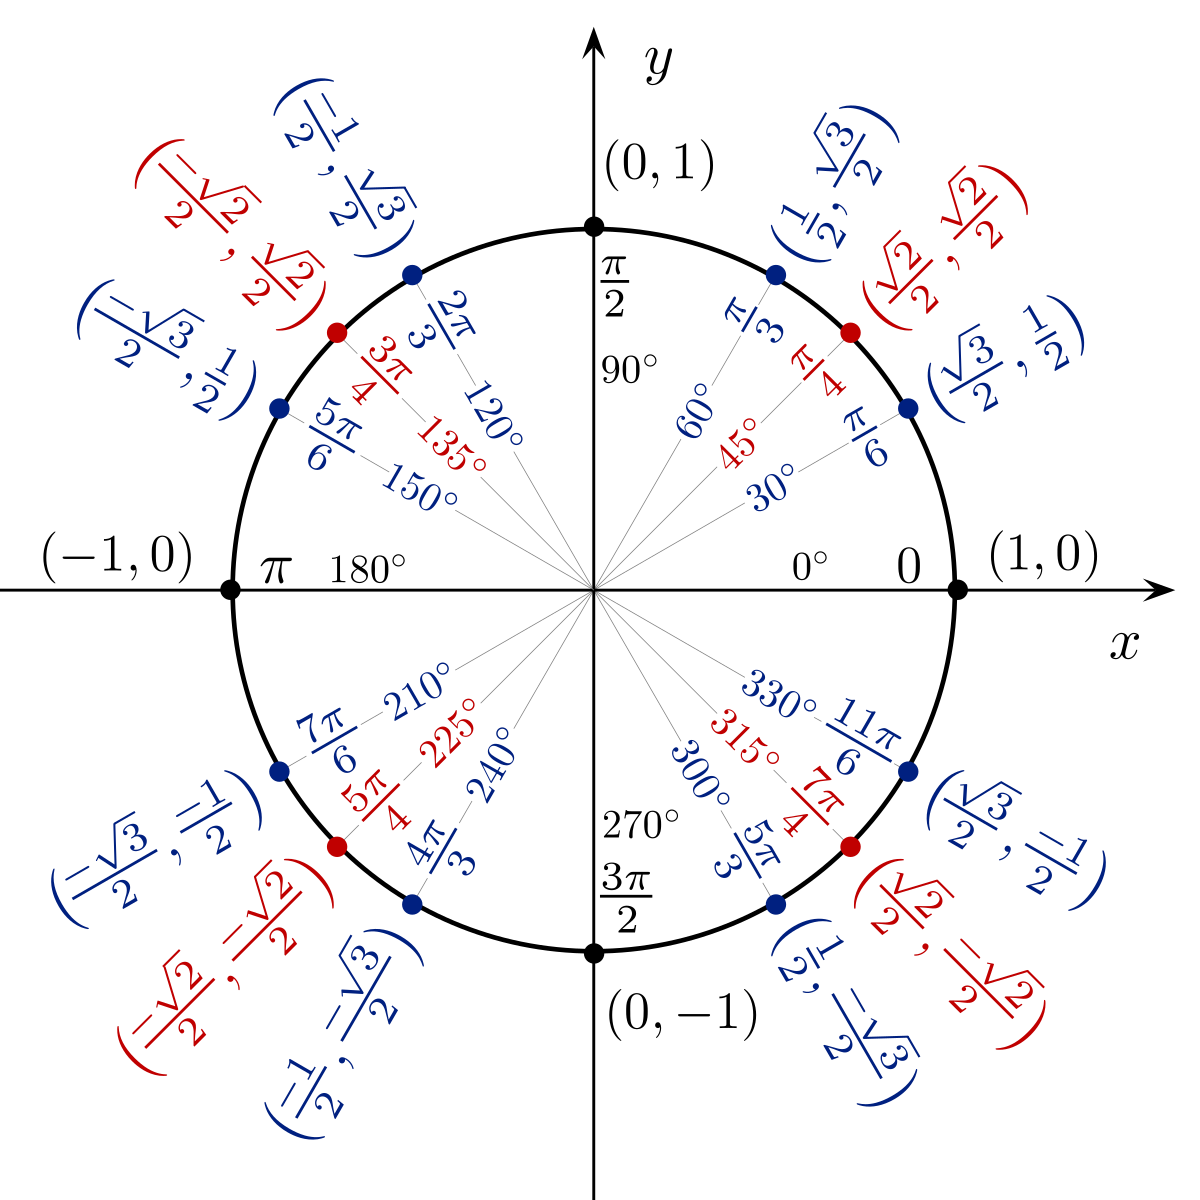

Adjacent is horizontal, Opposite is vertical (from right angle)  

Trigonometry is about studying triangles and, in particular, the relation of their angles to their edges. The ratio of two of the three edges (sides) of a triangle gives information about a particular angle, and to such a pair of sides, we give it a certain name and call it a function. 

tanθ = sinθ/cosθ  
inθ2 + cosθ2 = 1

In [1]:
from math import sqrt
def hypotenuse(a,b):
    h = sqrt(a**2 + b**2)
    return h

In [6]:
def find_hypotenuse(p1, p2):
    p3 = round( (p1**2 + p2**2)**0.5, 8)
    return p3

In [3]:
def find_trig(adjacent, opposite, hypotenuse):
    '''Returns the tuple (sin, cos, tan)'''
    return opposite/hypotenuse, adjacent/hypotenuse, \
           opposite/adjacent

In [7]:
p01 = 4
p02 = 4
print(find_trig(p01,p02,find_hypotenuse(p01,p02)))

(0.707106781123095, 0.707106781123095, 1.0)


Inverse trigonometric functions do the opposite: they admit a pure number as input and give an angle as output. So, if, for instance, a point, π, is mapped to point -1 (as the cos function does), then its inverse needs to do exactly the opposite. 

In [8]:
from math import acos, asin, atan, cos
x = 0.5
print(acos(x))

1.0471975511965979


#Vectors

Vectors are abstract mathematical objects with a magnitude (size) and direction (orientation). A vector is represented by an arrow that has a base (tail) and a head. The head shows the direction of the vector, while the length of the arrow's body shows its magnitude.

Addition as the operation that results in vector C = A + B = (a1 + b1, a2 + b2, a3 + b3).  
Subtraction as the operation that results in vector C = A - B = (a1 - b1, a2 - b2, a3 - b3).  
Dot (or inner or scalar) product of the scalar C = b. b = a1 b1 + a2 b2 + a3 b3.  
Cross (or exterior) product of the vector C = A x B, which is perpendicular to the plane define by A and B and has elements (a2b3 - a3b2, a3b1 - a1b3, a1b2 – a2b1).  
Element-wise or Hadamard product of two vectors, A and B, is the vector, C, whose elements are the pairwise product of elements of A and B; that is, C = (a1 b1, a2 b2, a3 b3).  

If A and B are orthogonal, then the dot product vanishes:

In [11]:
#To find the norm (magnitude) of each vector, we can use the following code:

A = np.array([2,10,0])
B = np.array([9,1,-1])

Amagn = np.sqrt(A.dot(A))
Bmagn = np.sqrt(B.dot(B))
#or
Amagn = np.linalg.norm(A)
Bmagn = np.linalg.norm(B)

print(Amagn, Bmagn)

10.198039027185569 9.1104335791443


In [15]:
theta = acos(A.dot(B) / (Amagn * Bmagn))
print(theta)

1.2646655256233297


#Next

#Next